In [ ]:

from skimage import io 
from skimage.transform import resize
from skimage.color import rgb2gray
import numpy as np
import cv2

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
import os
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def read_image(image_path):
    """Read and resize individual images - Caltech 101 avg size of image is 300x300, so we resize accordingly"""
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (100,100), interpolation=cv2.INTER_CUBIC)
    return img

In [ ]:
Data =[]
labels=[]



path = glob.glob('/content/drive/MyDrive/termProject/objects/*')

path = [i + "/*" for i in path]

path = [glob.glob(i) for i in path]

img_dir = np.array([])

for i in path:
  img_dir = np.concatenate((img_dir,i),axis = 0)


for i in img_dir:
    im = read_image(i)

    Data.append(im)

Data = np.array(Data)
Data = Data.astype(np.float64)/255
Data =Data.reshape(len(Data),100,100,3)
X_train = np.array(Data)
labels = np.array(labels)
len(Data)


3026

In [ ]:
Names=[]
for i in range (len(img_dir)):
    Names.append((img_dir[i].split("/")[6].split("_")[0]))

np.unique(Names)


array(['Faces', 'Leopards', 'Motorbikes', 'airplanes', 'bonsai', 'car',
       'chandelier', 'ketch', 'revolver', 'watch'], dtype='<U10')

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(Names)

list(le.classes_)

labels= le.transform(Names)
labels.shape


(3026,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data, labels, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18)



In [ ]:
from sklearn.utils import shuffle

X_train,y_train = shuffle(X_train, y_train)
X_test,y_test = shuffle(X_test, y_test)
X_val,y_val = shuffle(X_val, y_val)


In [ ]:
len(np.unique(Names))

10

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np


In [ ]:
model = Sequential()

#1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(100,100,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

#2nd Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))

#3rd Fully Connected Layer
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4))

#Output Layer
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

#Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 25, 25, 96)        34944     
_________________________________________________________________
batch_normalization_9 (Batch (None, 25, 25, 96)        384       
_________________________________________________________________
activation_9 (Activation)    (None, 25, 25, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 256)       614656    
_________________________________________________________________
batch_normalization_10 (Batc (None, 13, 13, 256)       1024      
_________________________________________________________________
activation_10 (Activation)   (None, 13, 13, 256)      

In [ ]:
#model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])


In [ ]:
X_val.shape,y_val.shape

((463, 100, 100, 3), (463,))

In [ ]:
history=model.fit(X_train, y_train,validation_data= (X_val, y_val), epochs = 50, batch_size= 32, shuffle = True )

Epoch 1/50
66/66 [==============================] - 6s 50ms/step - loss: 1.5042 - accuracy: 0.5648 - val_loss: 1.7403 - val_accuracy: 0.4384
Epoch 2/50
66/66 [==============================] - 2s 37ms/step - loss: 0.8384 - accuracy: 0.8630 - val_loss: 1.9186 - val_accuracy: 0.4320
Epoch 3/50
66/66 [==============================] - 2s 37ms/step - loss: 0.6586 - accuracy: 0.9153 - val_loss: 1.7633 - val_accuracy: 0.4946
Epoch 4/50
66/66 [==============================] - 2s 37ms/step - loss: 0.5600 - accuracy: 0.9296 - val_loss: 1.9127 - val_accuracy: 0.3715
Epoch 5/50
66/66 [==============================] - 2s 37ms/step - loss: 0.5139 - accuracy: 0.9401 - val_loss: 1.4444 - val_accuracy: 0.5508
Epoch 6/50
66/66 [==============================] - 2s 37ms/step - loss: 0.4371 - accuracy: 0.9587 - val_loss: 1.7041 - val_accuracy: 0.5443
Epoch 7/50
66/66 [==============================] - 2s 38ms/step - loss: 0.3878 - accuracy: 0.9682 - val_loss: 0.7042 - val_accuracy: 0.8704
Epoch 8/50
66

In [ ]:
model.evaluate(X_test,y_test)

15/15 [==============================] - 0s 13ms/step - loss: 0.1490 - accuracy: 0.9714


[0.14899763464927673, 0.9713656306266785]

In [ ]:
predicted_classes_all = model.predict(X_test)
predicted_classes_all = np.argmax(predicted_classes_all,axis=1)
True_classes_all = y_test
print(classification_report(True_classes_all, predicted_classes_all))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.97      1.00      0.99        38
           2       0.98      1.00      0.99       103
           3       1.00      0.98      0.99       123
           4       0.88      0.83      0.86        18
           5       1.00      1.00      1.00        21
           6       0.73      0.92      0.81        12
           7       0.96      1.00      0.98        23
           8       0.80      0.80      0.80         5
           9       0.94      0.87      0.91        39

    accuracy                           0.97       454
   macro avg       0.93      0.94      0.93       454
weighted avg       0.97      0.97      0.97       454



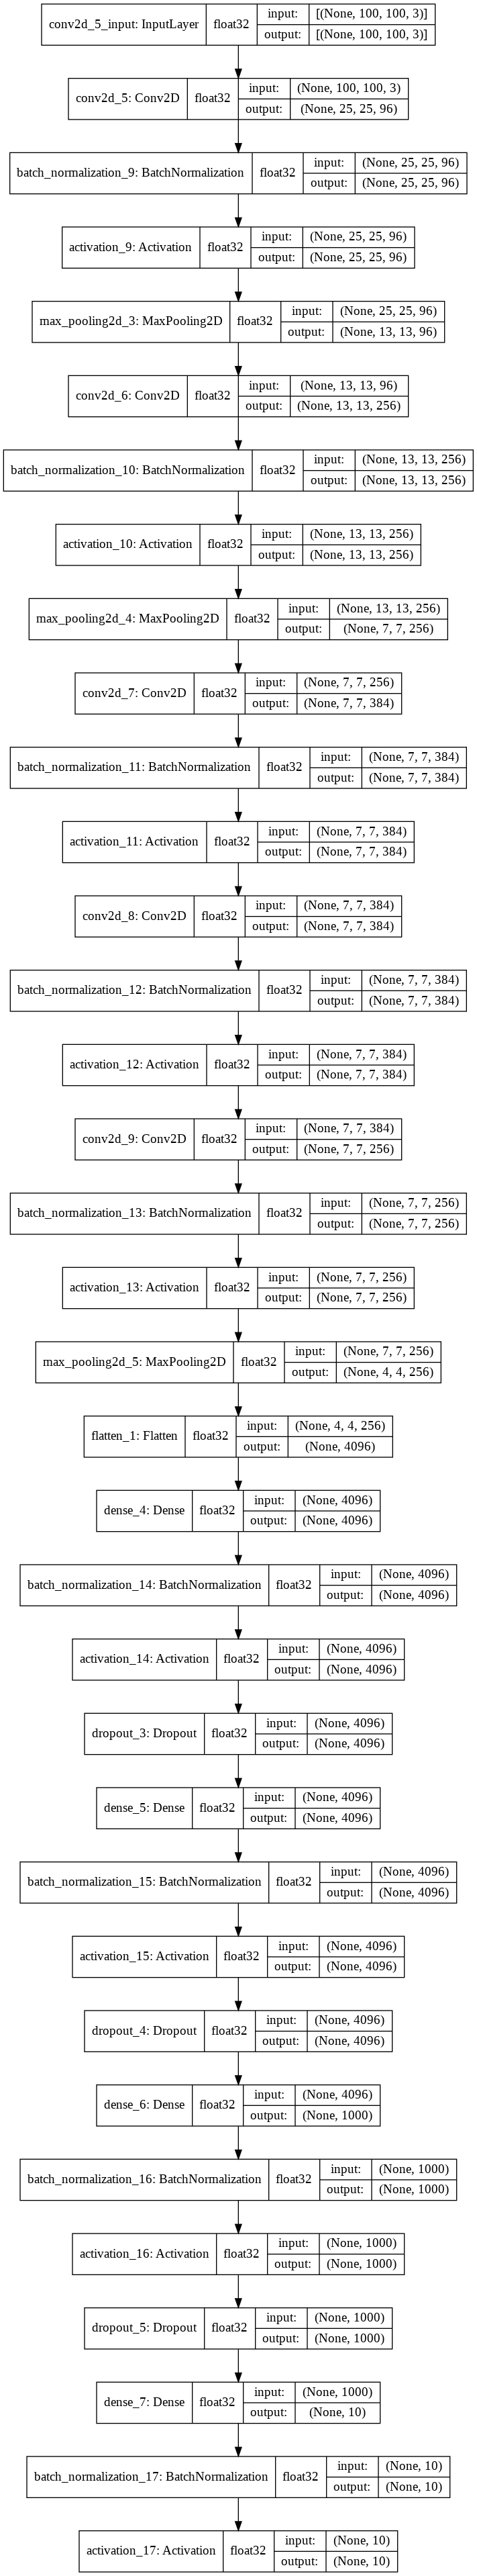

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)


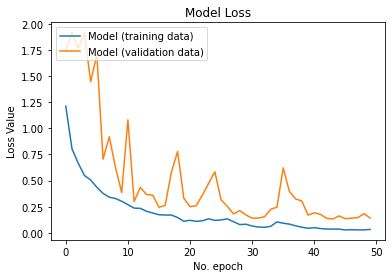

In [ ]:
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# Some TensorFlow/Keras model


# Plot history: MAE
plt.plot(history.history['loss'], label='Model (training data)')
plt.plot(history.history['val_loss'], label='Model (validation data)')
plt.title('Model Loss')
plt.ylabel('Loss Value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

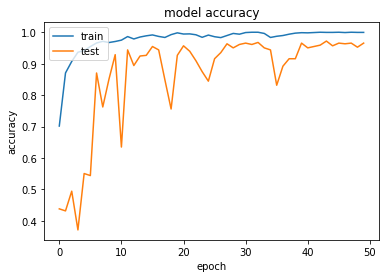

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#!zip -r /content/model97.zip /content/model97.h5py

In [ ]:
import sklearn.metrics as metrics
matrix = metrics.confusion_matrix(True_classes_all, predicted_classes_all)
matrix


array([[ 71,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,  38,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 103,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1, 121,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,  15,   0,   1,   0,   0,   2],
       [  0,   0,   0,   0,   0,  21,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,  11,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  23,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   4,   0],
       [  0,   0,   0,   0,   2,   0,   2,   0,   1,  34]])

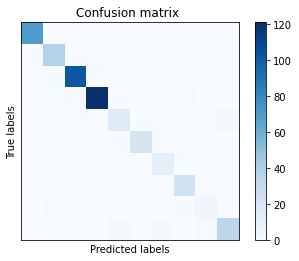

In [ ]:
plt.imshow(matrix, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

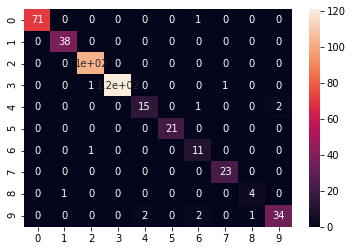

In [ ]:
import seaborn as sns

cm = confusion_matrix(True_classes_all, predicted_classes_all)
f = sns.heatmap(cm, annot=True)

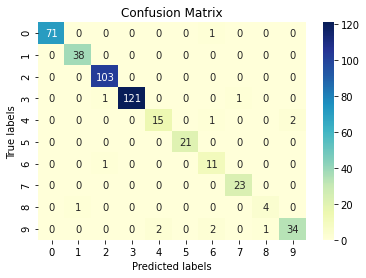

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap="YlGnBu",);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(confusion_matrix, class_names, errors_only=False, figsize = (50,20), fontsize=3):
    """
    Plots confusion matrix as a color-encoded Seaborn heatmap.  Zeroes are
    colored white.  Normalized values that are zero when rounded to three
    decimals, Ex. 0.000, will be colored white.  Get more decicmals by
    updating fmt, for example to '0.4f', and updating get_text() value.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object sklearn.metrics.confusion_matrix. 
    class_names: list
        List of class names in the order they index the confusion matrix.
    figsize: tuple
        A pair tuple.  The first value is figure width.  The second
        value is figure height. Defaults to (15,6).
    fontsize: int
        Font size for axes labels. Defaults to 16.
    """        
    #Instantiate Figure
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.subplots_adjust(wspace = 0.5)
    
    #Show errors only by filling diagonal with zeroes.
    if errors_only:
        np.fill_diagonal(confusion_matrix, 0)        
        
    # ax1 - Normalized Confusion Matrix    
    #Normalize by dividing (M X M) matrix by (M X 1) matrix.  (M X 1) is row totals.
    conf_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:,np.newaxis]
    conf_matrix_norm = np.nan_to_num(conf_matrix_norm)  #fix any nans caused by zero row total
    df_cm_norm = pd.DataFrame(conf_matrix_norm, index=class_names, columns=class_names)
    heatmap = sns.heatmap(df_cm_norm, ax=ax1, cmap='Greens', fmt='.3f', annot=True, annot_kws={"size": fontsize},
              linewidths=2, linecolor='black', cbar=False)
    
    ax1.tick_params(axis='x', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax1.tick_params(axis='y', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax1.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])  #Fix messed up ylim
    ax1.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax1.set_ylabel('TRUE CLASS', fontsize=fontsize, color='black')
    ax1.set_title('Confusion Matrix - Normalized', pad=15, fontsize=fontsize, color='black')
    
    # ax2 - Confusion Matrix - Class Counts
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)    
    heatmap = sns.heatmap(df_cm, ax=ax2, cmap='Greens', fmt='d', annot=True, annot_kws={"size": fontsize+4},
              linewidths=2, linecolor='black', cbar=False)   
    
    ax2.tick_params(axis='x', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax2.tick_params(axis='y', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax2.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])  #Fix bug in matplotlib 3.1.1.  Or, use earlier matplotlib.
    ax2.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax2.set_ylabel('TRUE CLASS', fontsize=fontsize, color='black')
    ax2.set_title('Confusion Matrix - Class Counts', pad=15, fontsize=fontsize, color='black')    
  
    for text in ax1.texts:
        if text.get_text() == '0.000':
            text.set_color(color='white')            
    for text in ax2.texts:
        if text.get_text() == '0':
            text.set_color(color='white')

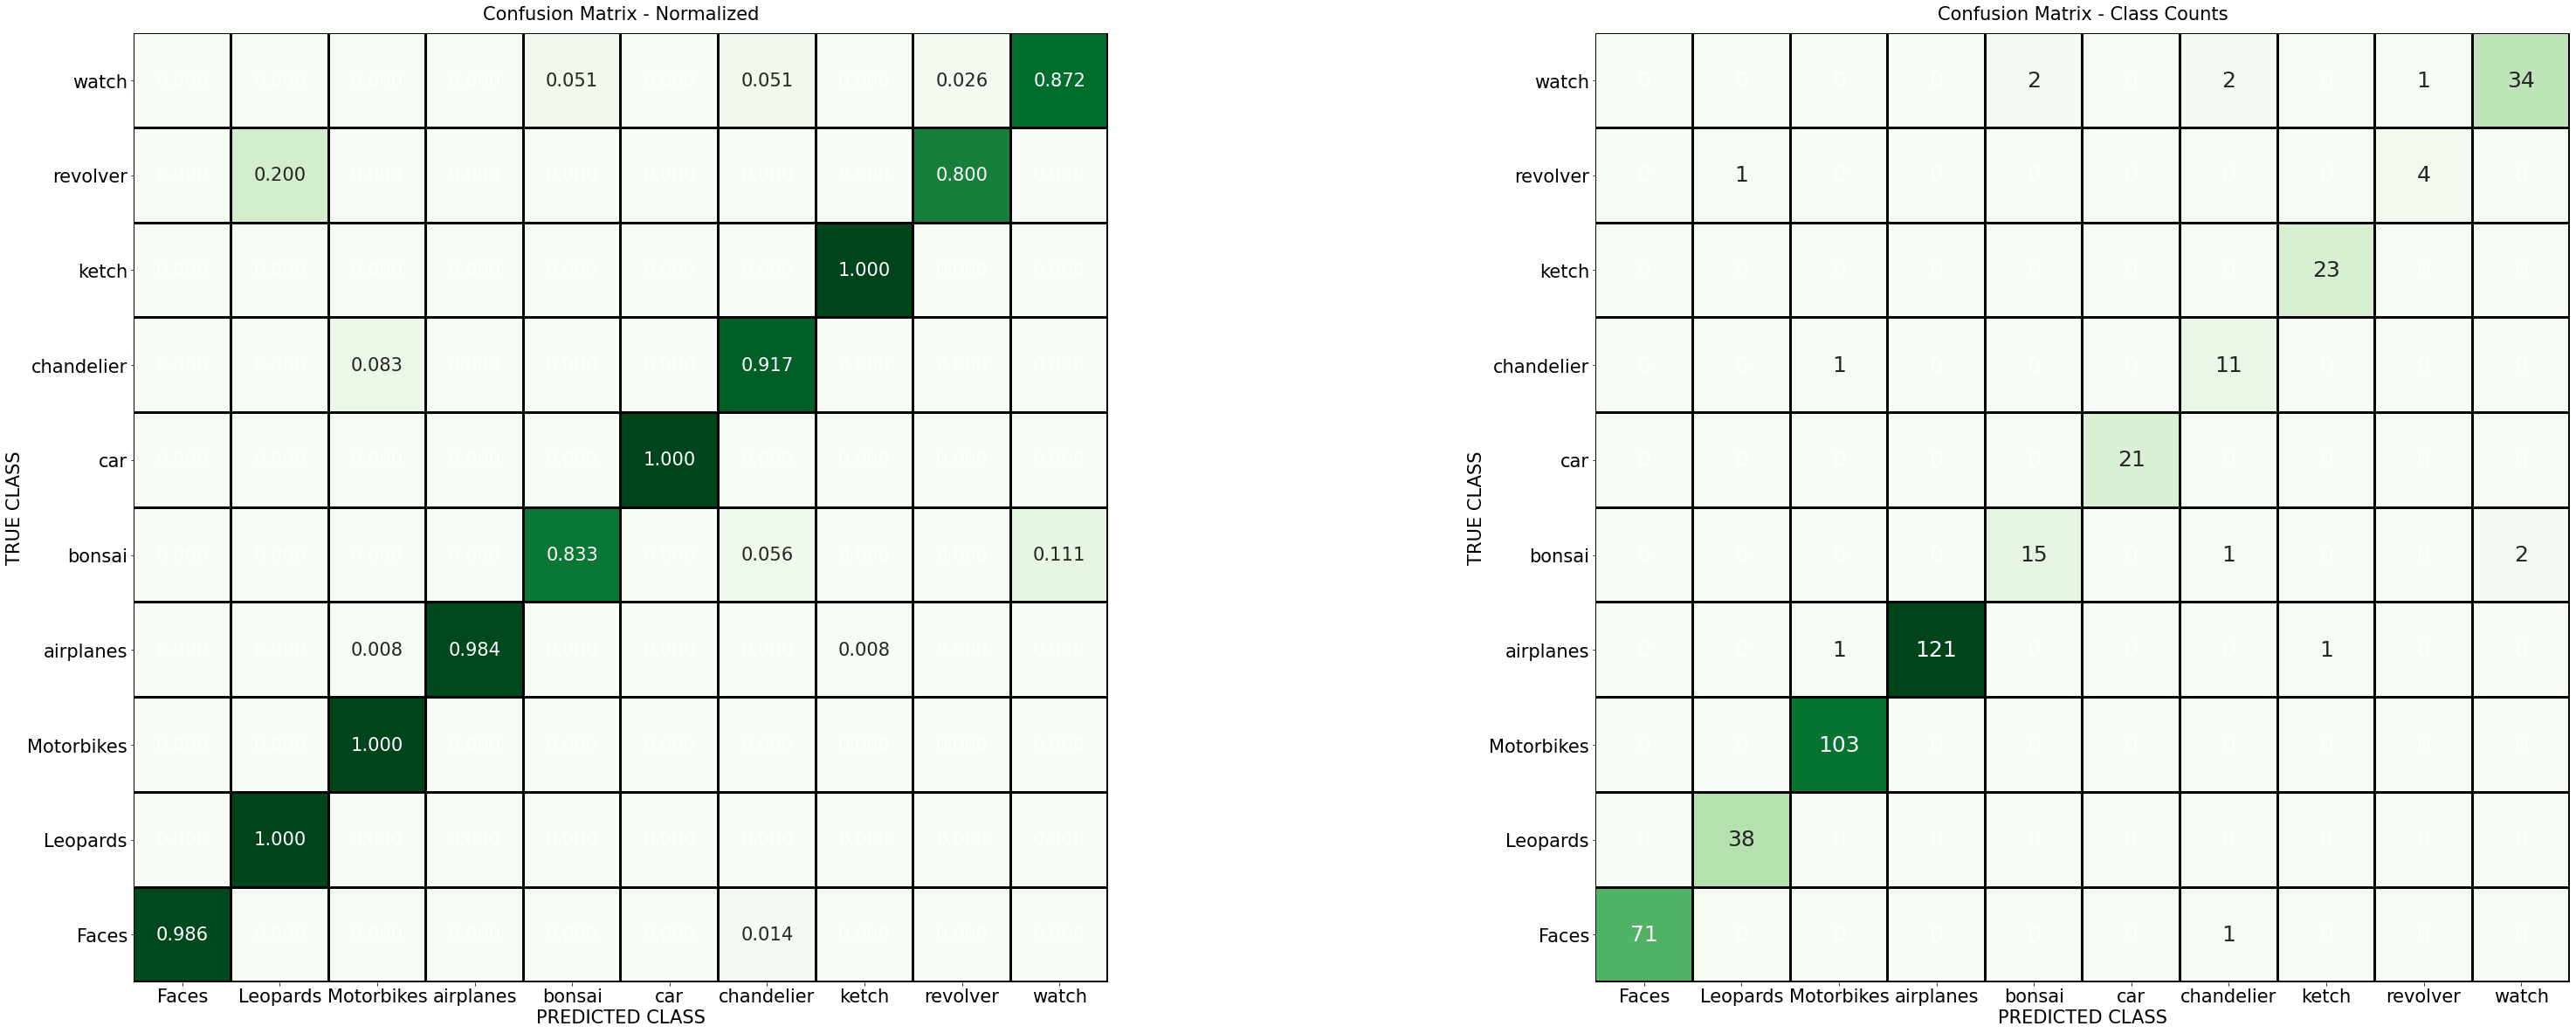

In [ ]:
plot_confusion_matrix(confusion_matrix=matrix, class_names=np.unique(Names), errors_only=False, fontsize=21)

In [ ]:
#labels=le.inverse_transform(labels)
#predicted_classes_all=le.inverse_transform(predicted_classes_all)

In [ ]:
#predicted_classes_all = model.predict(Data)
#predicted_classes_all = np.argmax(predicted_classes_all,axis=1)
#True_classes_all = labels

In [ ]:
#model.save("model97.h5py")

In [ ]:
#import pandas as pd


#len(predicted_classes_all)
#data = {'Image Name':Names,'Real lables':labels,'Predected Labels':predicted_classes_all}

#df = pd.DataFrame(data)

#df.to_csv('AllDataPredicted.csv')

In [ ]:
#plt.imshow(Data[2088])